In [40]:
#importing dataset and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [41]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [42]:
X_train, y_train = train['features'], train['labels'] 
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [43]:
X_train.shape

(34799, 32, 32, 3)

In [44]:
y_train.shape

(34799,)

In [45]:
X_validation.shape

(4410, 32, 32, 3)

In [46]:
y_validation.shape

(4410,)

In [47]:
X_test.shape

(12630, 32, 32, 3)

In [48]:
y_test.shape

(12630,)

36

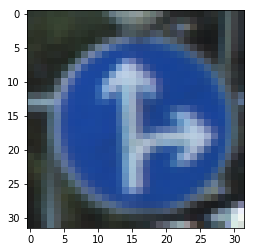

In [49]:
s = 1220
plt.imshow(X_train[s])
y_train[s]

36

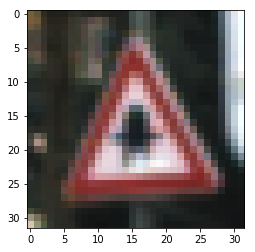

In [50]:
v = 1220
plt.imshow(X_validation[v])
y_train[v]

36

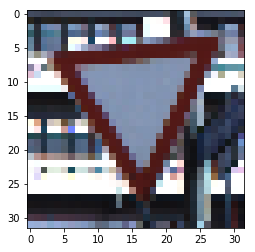

In [51]:
t = 1220
plt.imshow(X_test[t])
y_train[t]

In [96]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [97]:
#changing the color image to grayscale
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [98]:
X_train_gray.shape

(34799, 32, 32, 1)

In [99]:
X_test_gray.shape

(12630, 32, 32, 1)

In [100]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [101]:
#performing normalisation to the data images
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

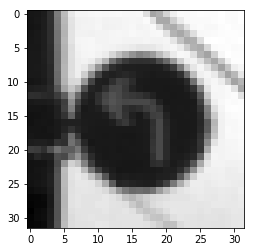

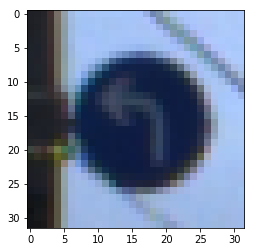

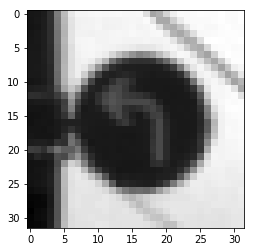

In [102]:
#checking if the image is preserved or not
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

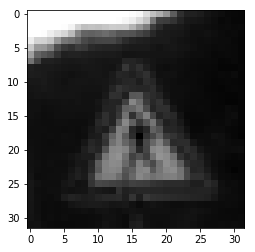

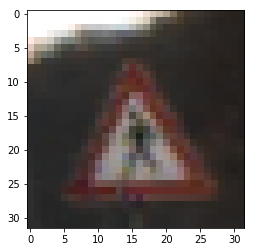

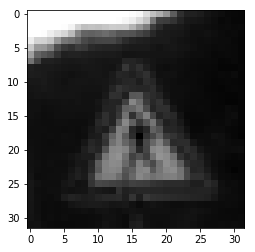

In [103]:
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

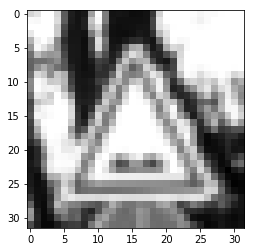

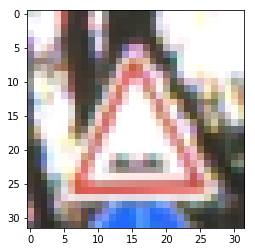

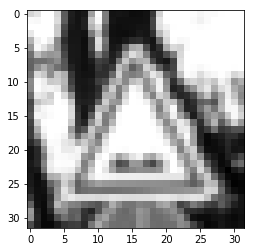

In [104]:
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [105]:
#using keras api to develop the convolution network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [106]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax')) #need the output to be categorical

In [107]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [108]:
history = cnn_model.fit(X_train_gray_norm,
             y_train, 
             batch_size = 500,
             nb_epoch = 100,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 14s 412us/step - loss: 2.5549 - acc: 0.3528 - val_loss: 1.8350 - val_acc: 0.5098
Epoch 2/100
34799/34799 [==============================] - 14s 392us/step - loss: 1.0134 - acc: 0.7439 - val_loss: 0.9412 - val_acc: 0.7410
Epoch 3/100
34799/34799 [==============================] - 15s 445us/step - loss: 0.5624 - acc: 0.8612 - val_loss: 0.7470 - val_acc: 0.7955
Epoch 4/100
34799/34799 [==============================] - 14s 390us/step - loss: 0.3871 - acc: 0.9100 - val_loss: 0.6769 - val_acc: 0.8000
Epoch 5/100
34799/34799 [==============================] - 14s 389us/step - loss: 0.2960 - acc: 0.9330 - val_loss: 0.6235 - val_acc: 0.8315
Epoch 6/100
34799/34799 [==============================] - 14s 390us/step - loss: 0.2357 - acc: 0.9477 - val_loss: 0.5698 - val_acc: 0.8456
Epoch 7/100
34799/34799 [==============================] - 14s 391us/step - loss: 0.1968 - acc: 0.9573 - val_lo

In [109]:
#model evaluation
#first we evaluate the model with testing dataset
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('test accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 250us/step
test accuracy: 0.9004750593446684


In [110]:
history.history.keys()

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])

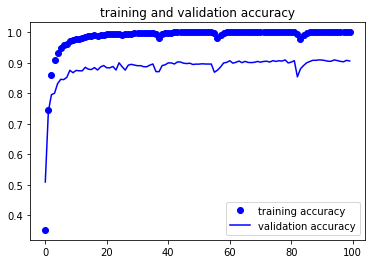

In [111]:
#plotting 
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plotting the above variable vs the eopchs
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'validation accuracy')
plt.title('training and validation accuracy')
plt.legend()

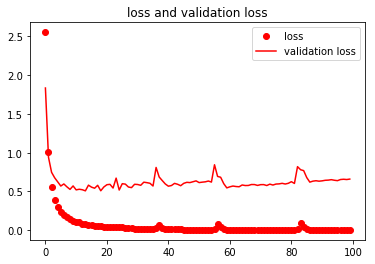

In [112]:
plt.plot(epochs, loss, 'ro', label = 'loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title('loss and validation loss')
plt.legend()

In [113]:
#to evaluate we predict and create a confusion matrix
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

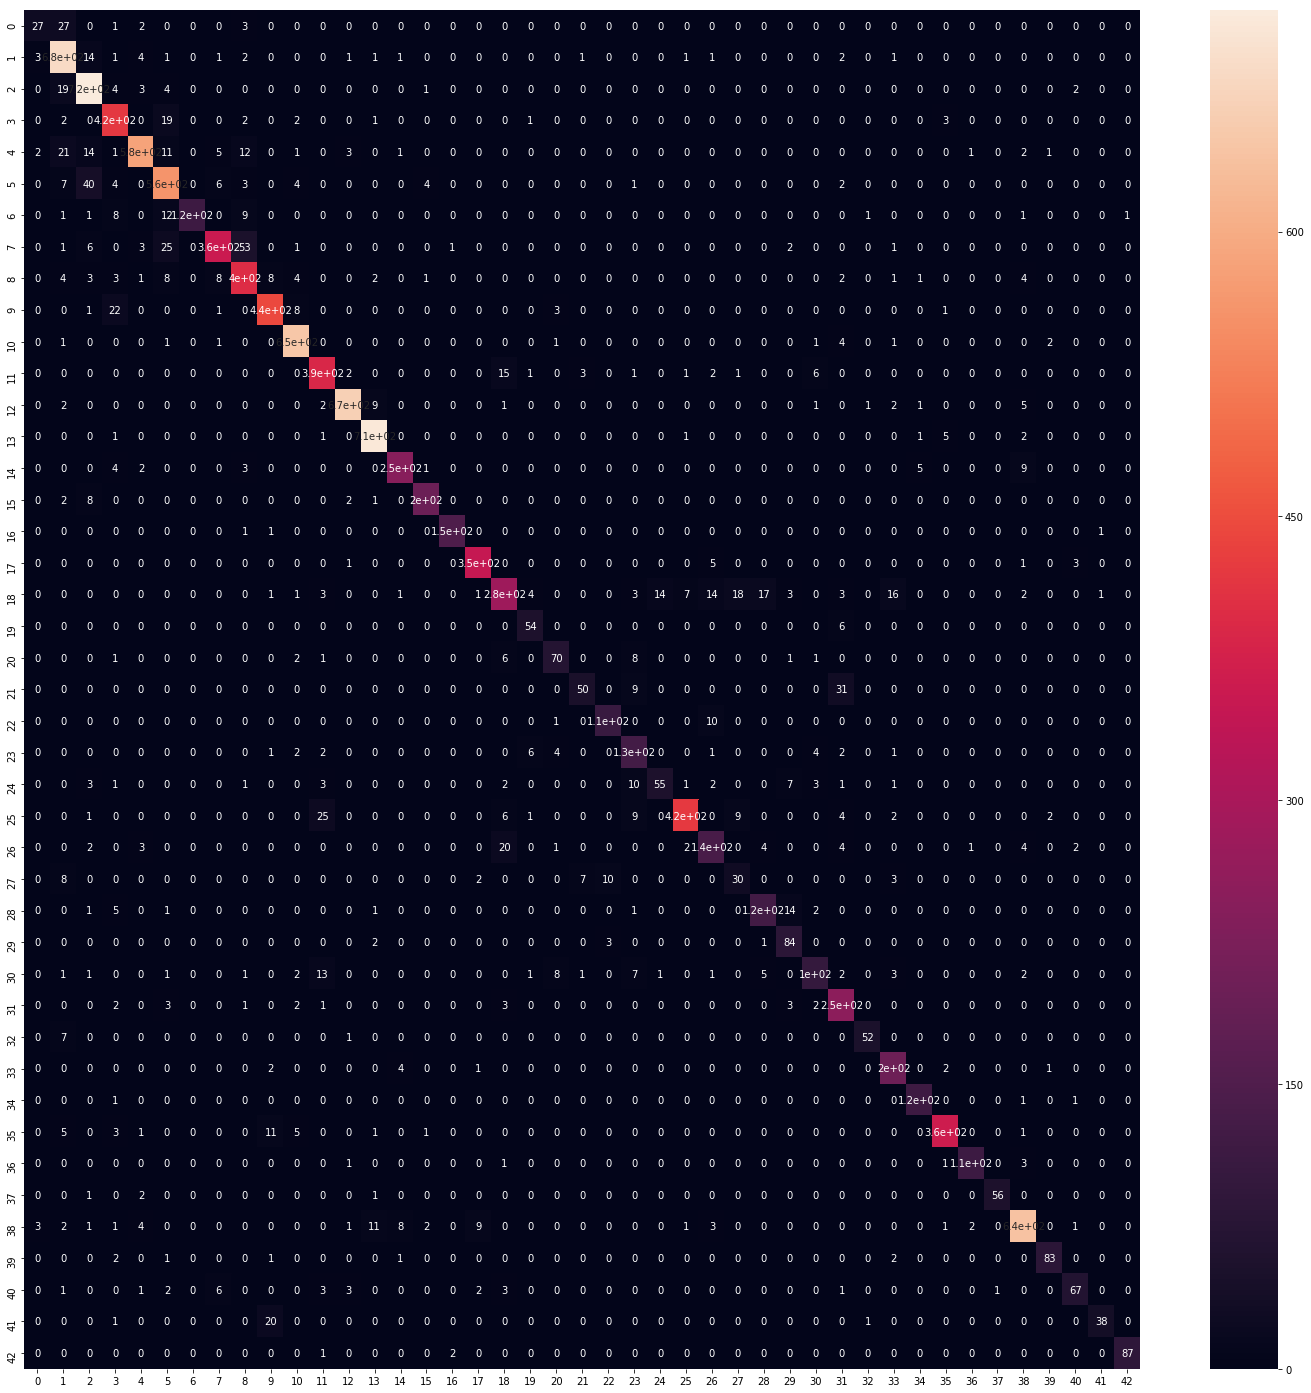

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

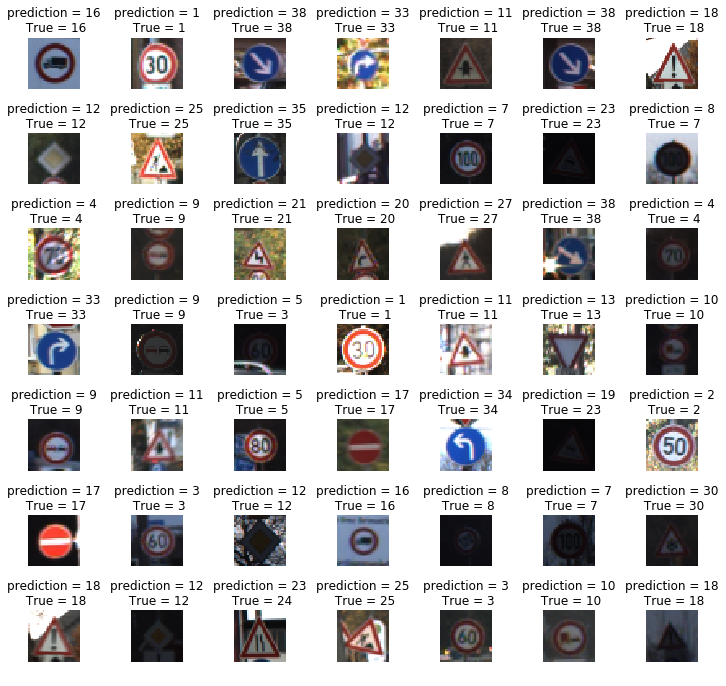

In [120]:
#image vs label vs prediction
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)
